# Ritmu TV - Data Analysis and Case Study

### Imports

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.feature_selection import mutual_info_regression

In [101]:
df = pd.read_excel("data.xlsx")
print(df.describe())

                      Date          1st         2nd1         2nd2  \
count                   92    92.000000    92.000000    92.000000   
mean   2024-10-31 12:00:00  5085.391304  5163.228261  4892.282609   
min    2024-09-16 00:00:00   259.000000    62.000000   145.000000   
25%    2024-10-08 18:00:00  2840.250000  3201.500000  2493.250000   
50%    2024-10-31 12:00:00  5128.000000  5093.000000  4596.500000   
75%    2024-11-23 06:00:00  7792.750000  7146.750000  7141.750000   
max    2024-12-16 00:00:00  9918.000000  9950.000000  9938.000000   
std                    NaN  2905.467759  2591.560106  2952.269934   

               2nd3  
count     92.000000  
mean    5493.869565  
min      189.000000  
25%     2262.500000  
50%     5104.000000  
75%     6715.750000  
max    70178.000000  
std     7375.550446  


<Axes: >

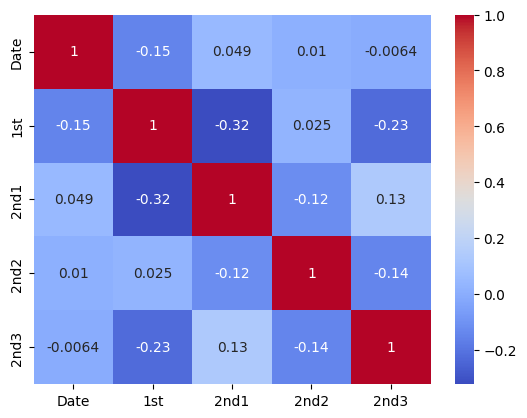

In [102]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [103]:
all_data = pd.concat([df["1st"], df["2nd1"], df["2nd2"], df["2nd3"]])
print(all_data.head())

0    7801
1    9035
2    3730
3    5027
4    5119
dtype: int64


### Distributive Analysis - Step 1
Comparing the Dataset to existing popular Statistical Distributions to find the Closest Matching if any.

In [104]:
# Function to Compare Dataset with Different Statistical Distributions
def fit_distributions(data):
  distributions = ["norm", "expon", "uniform", "lognorm", "gamma", "beta"]
  results = []

  plt.figure(figsize=(12, 8))
  plt.hist(data, bins=30, density=True, alpha=0.6, color="gray", label="Data Histogram")

  for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(data)

    x = np.linspace(min(data), max(data), 100)
    pdf = dist.pdf(x, *params)

    plt.plot(x, pdf, label=f"{dist_name.capitalize()}")

    # Performing Kolmogorov-Smirnov goodness-of-fit Test
    D, p_value = stats.kstest(data, dist_name, args=params)
    results.append((dist_name, D, p_value))

  plt.legend()
  plt.title("Comparisons of Distributions")
  plt.xlabel("Value")
  plt.ylabel("Density")
  plt.show()

  print("Goodness-of-fit Results:")
  for dist_name, D, p_value in results:
    print(f"{dist_name.capitalize()} Distribution: D={D:.4f}, p-value={p_value:.4f}")

c:\Users\mohdm\Documents\Code\Personal\turing-two\.venv\lib\site-packages\scipy\stats\_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\mohdm\Documents\Code\Personal\turing-two\.venv\lib\site-packages\scipy\stats\_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


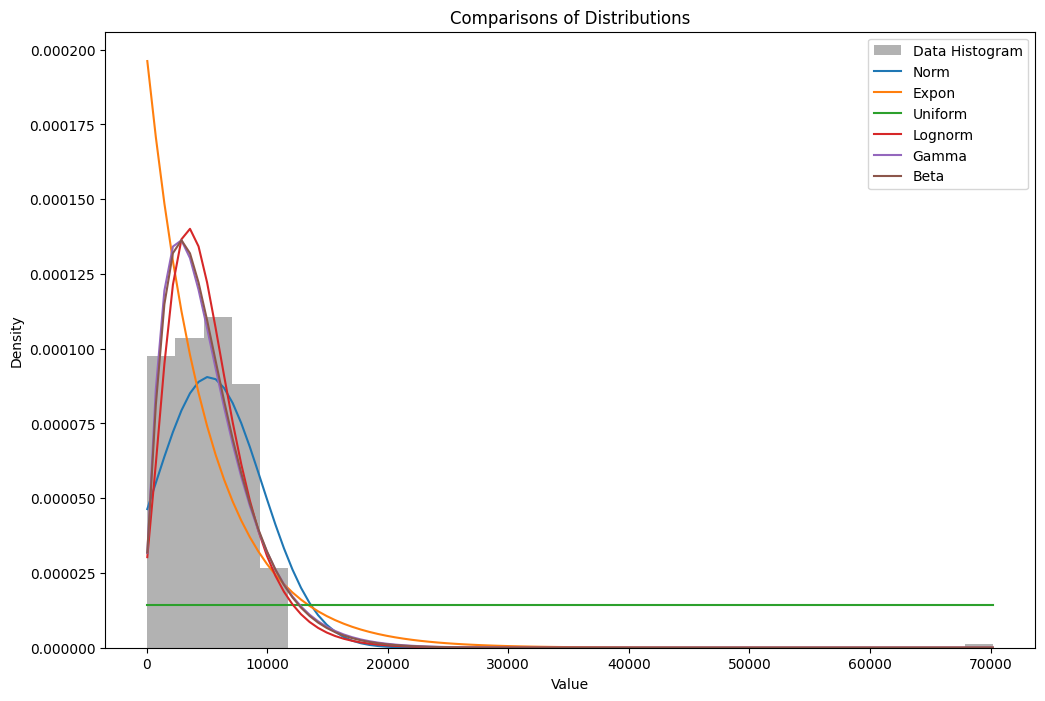

Goodness-of-fit Results:
Norm Distribution: D=0.1356, p-value=0.0000
Expon Distribution: D=0.1560, p-value=0.0000
Uniform Distribution: D=0.8563, p-value=0.0000
Lognorm Distribution: D=0.0908, p-value=0.0043
Gamma Distribution: D=0.1024, p-value=0.0008
Beta Distribution: D=0.0988, p-value=0.0014


In [105]:
fit_distributions(all_data)

With weak p-value results that are not even close to ~0.05, we can safely assume that the dataset doesn't move according to popular statistical distributions.

### Distributive Analysis - Step 2
Performing an autocorrelation analysis to identify internal data correlation, i.e., periodicity or cyclic (repetitive) behaviour

<Figure size 1000x600 with 0 Axes>

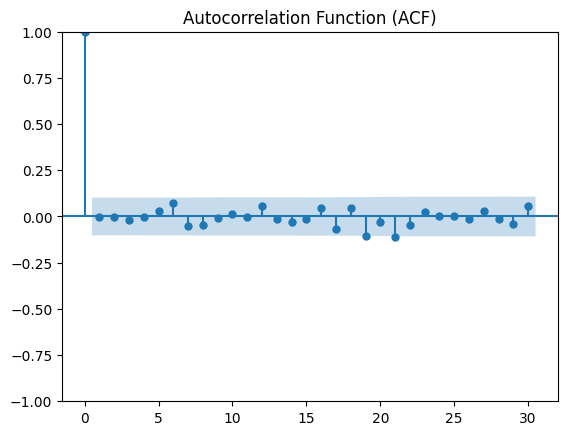

In [106]:
# Plotting the Autocorrelation Function
plt.figure(figsize=(10, 6))
plot_acf(all_data, lags=30, title="Autocorrelation Function (ACF)")
plt.show()

### Distributive Analysis - Step 3
Performing non-linear Data analysis using Mutual Information

c:\Users\mohdm\Documents\Code\Personal\turing-two\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mohdm\Documents\Code\Personal\turing-two\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mohdm\Documents\Code\Personal\turing-two\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mohdm\Documents\Code\Personal\turing-two\.venv\lib\site-packages\sklearn\utils\validation.py:1408: D

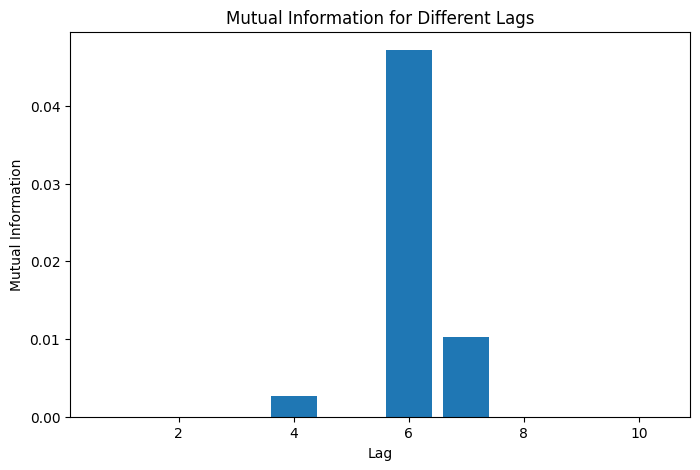

In [107]:
numeric_columns = ['1st', '2nd1', '2nd2', '2nd3']
data = df[numeric_columns].dropna()

numeric_data = np.array(data).flatten().astype(float).reshape(-1, 1)
lags = np.arange(1, 11)
mi_scores = []

for lag in lags:
    shifted_data = np.roll(numeric_data, lag)
    mi = mutual_info_regression(numeric_data[:-lag], shifted_data[:-lag].reshape(-1, 1))
    mi_scores.append(mi[0])

plt.figure(figsize=(8, 5))
plt.bar(lags, mi_scores)
plt.xlabel("Lag")
plt.ylabel("Mutual Information")
plt.title("Mutual Information for Different Lags")
plt.show()

### Distributive Analysis - Step 4
Performing Spectral Analysis for Identifying Seasonal Trends in the Dataset if any.

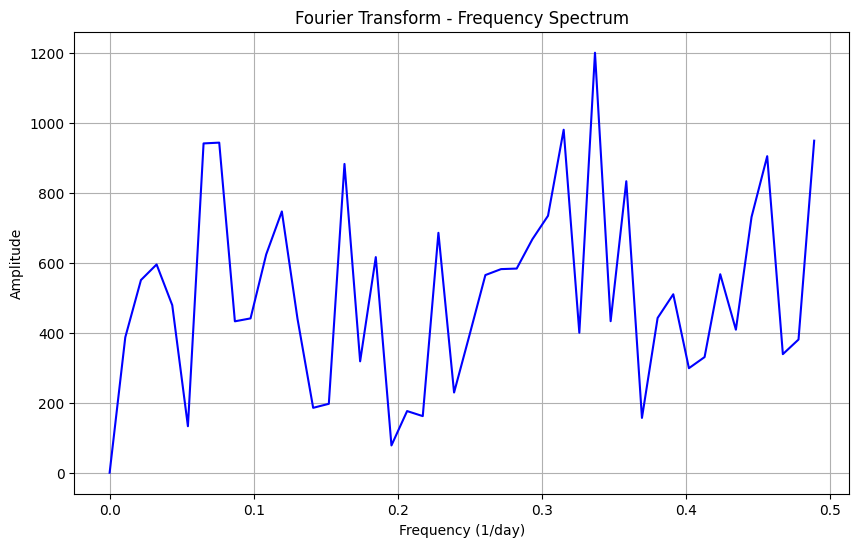

In [108]:
# Split Out 1st Column
first = df["1st"].values
first_detrended_values = first - np.mean(first)

N1 = len(first_detrended_values)
T1 = 1.0

first_fft_results = fft(first_detrended_values)
first_frequencies = fftfreq(N1, T1)[:N1 // 2]

first_magnitude = 2.0 / N1 * np.abs(first_fft_results[:N1 // 2])

plt.figure(figsize=(10, 6))
plt.plot(first_frequencies, first_magnitude, 'b-')
plt.title("Fourier Transform - Frequency Spectrum")
plt.xlabel("Frequency (1/day)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

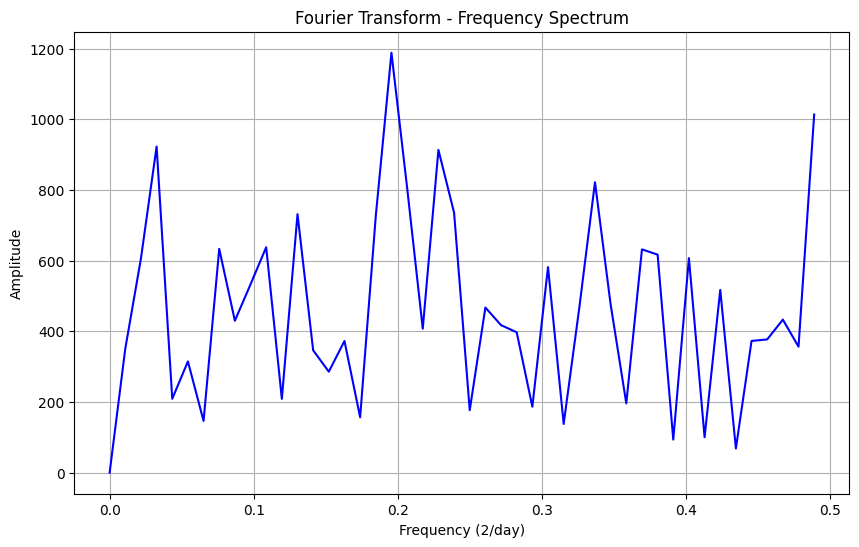

In [109]:
# Split Out 2nd Column
second = df["2nd1"].values
second_detrended_values = second - np.mean(second)

N2 = len(second_detrended_values)
T2 = 1.0

second_fft_results = fft(second_detrended_values)
second_frequencies = fftfreq(N2, T2)[:N2 // 2]

second_magnitude = 2.0 / N2 * np.abs(second_fft_results[:N2 // 2])

plt.figure(figsize=(10, 6))
plt.plot(second_frequencies, second_magnitude, 'b-')
plt.title("Fourier Transform - Frequency Spectrum")
plt.xlabel("Frequency (2/day)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

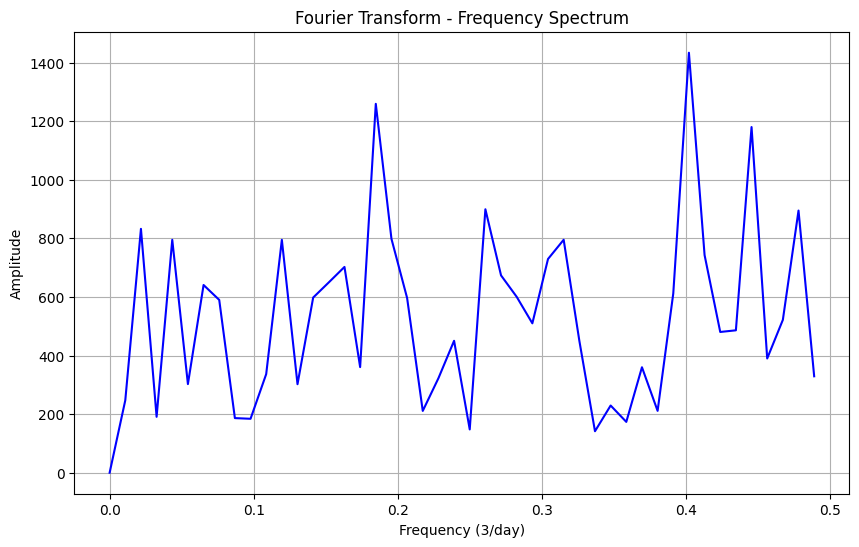

In [110]:
# Split Out 3nd Column
second_second = df["2nd2"].values
second_second_detrended_values = second_second - np.mean(second_second)

N3 = len(second_second_detrended_values)
T3 = 1.0

second_second_fft_results = fft(second_second_detrended_values)
second_second_frequencies = fftfreq(N3, T3)[:N3 // 2]

second_second_magnitude = 2.0 / N3 * np.abs(second_second_fft_results[:N3 // 2])

plt.figure(figsize=(10, 6))
plt.plot(second_second_frequencies, second_second_magnitude, 'b-')
plt.title("Fourier Transform - Frequency Spectrum")
plt.xlabel("Frequency (3/day)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

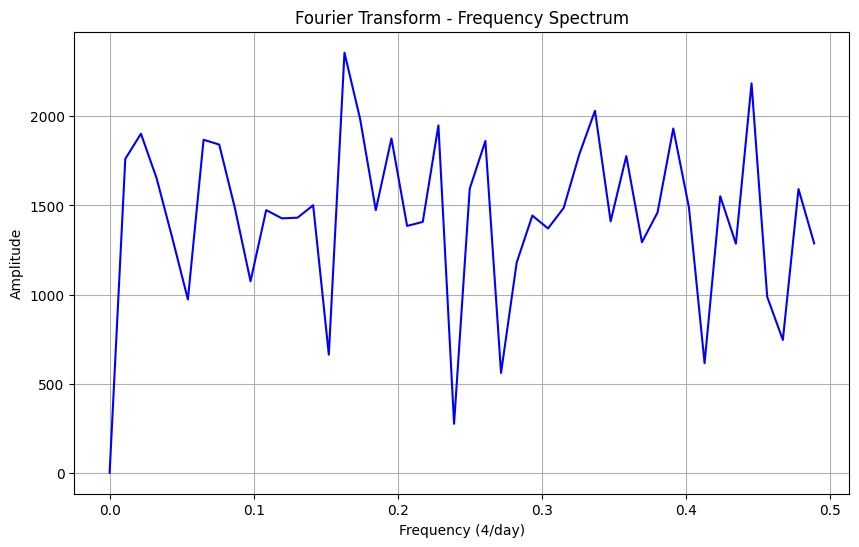

In [111]:
# Split Out 4nd Column
second_third = df["2nd3"].values
second_third_detrended_values = second_third - np.mean(second_third)

N4 = len(second_third_detrended_values)
T4 = 1.0

second_third_fft_results = fft(second_third_detrended_values)
second_third_frequencies = fftfreq(N4, T4)[:N4 // 2]

second_third_magnitude = 2.0 / N4 * np.abs(second_third_fft_results[:N4 // 2])

plt.figure(figsize=(10, 6))
plt.plot(second_third_frequencies, second_third_magnitude, 'b-')
plt.title("Fourier Transform - Frequency Spectrum")
plt.xlabel("Frequency (4/day)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()